In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os
os.chdir("/Users/christianleis/Library/CloudStorage/OneDrive-Personal/Desktop-OneDrive/02_TU_Wien/Project/reddit_inflation_index")
print("Now in:", os.getcwd())

Now in: /Users/christianleis/Library/CloudStorage/OneDrive-Personal/Desktop-OneDrive/02_TU_Wien/Project/reddit_inflation_index


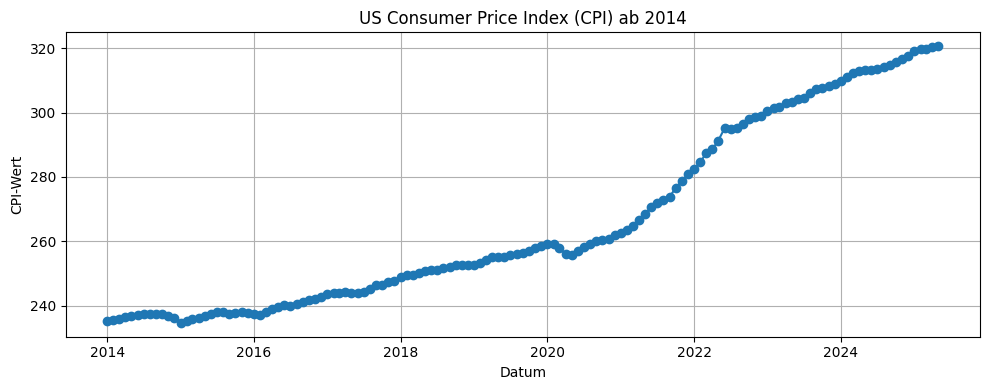

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# === Daten laden ===
df = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])

# === Filter: ab 2014 ===
df = df[df["date"].dt.year >= 2014]

# === Plot ===
plt.figure(figsize=(10, 4))
plt.plot(df["date"], df["cpi_value"], marker="o")
plt.title("US Consumer Price Index (CPI) ab 2014")
plt.xlabel("Datum")
plt.ylabel("CPI-Wert")
plt.grid(True)
plt.tight_layout()
plt.show()

## 1st Version Index

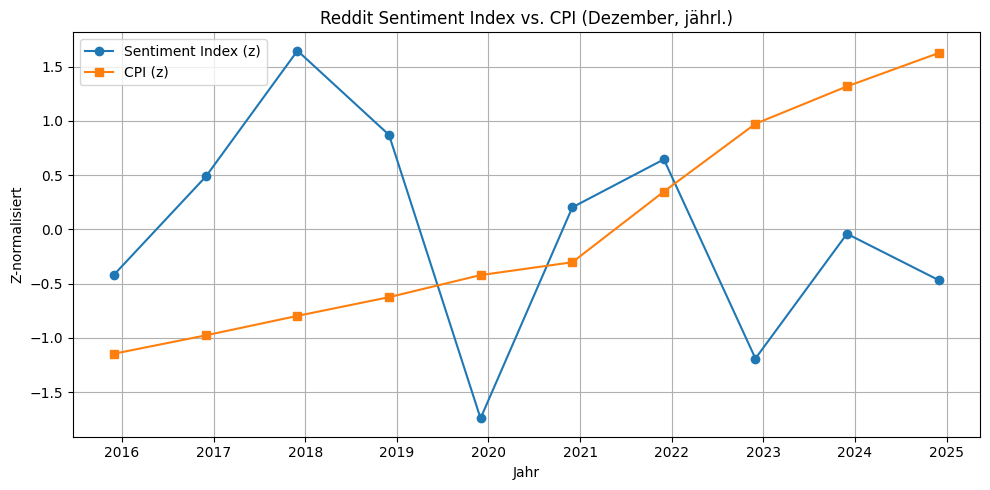

Korrelation (z-transformiert): -0.325


In [21]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_personalfinance.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

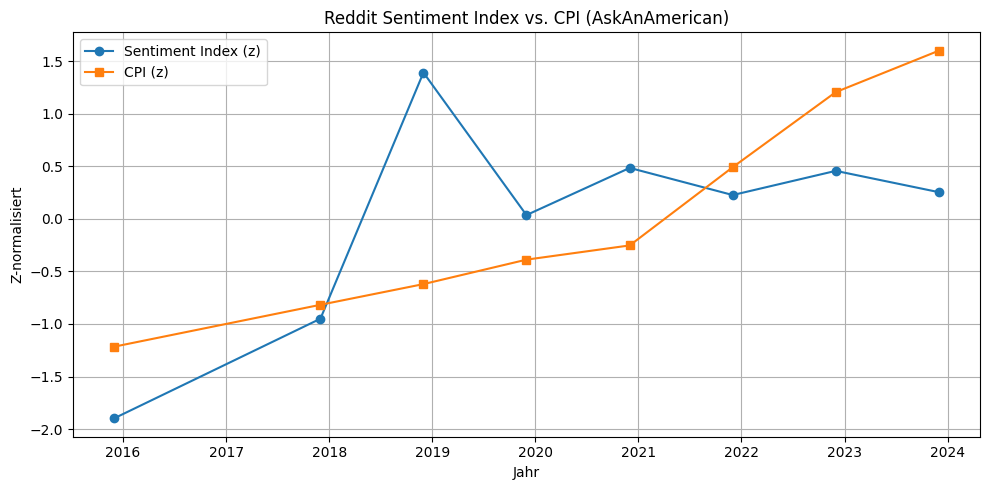

Korrelation für AskAnAmerican (z-transformiert): 0.450


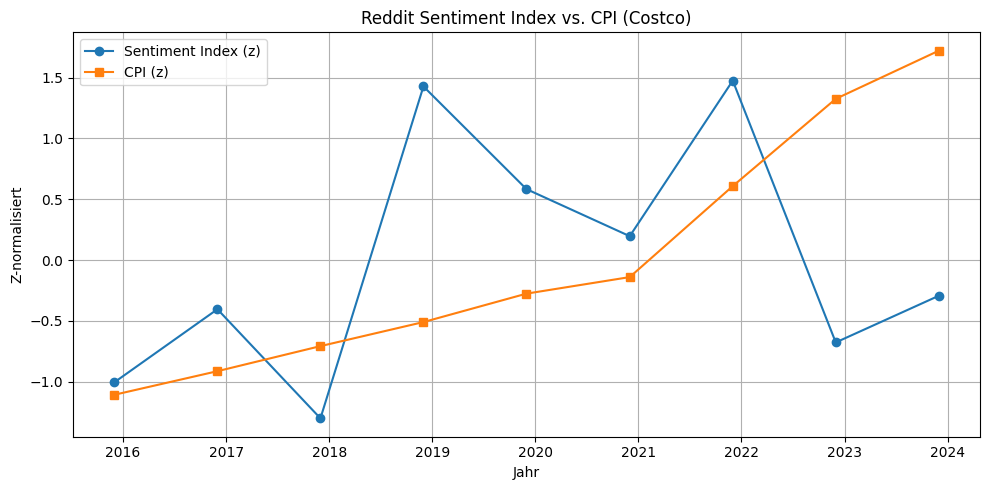

Korrelation für Costco (z-transformiert): 0.123


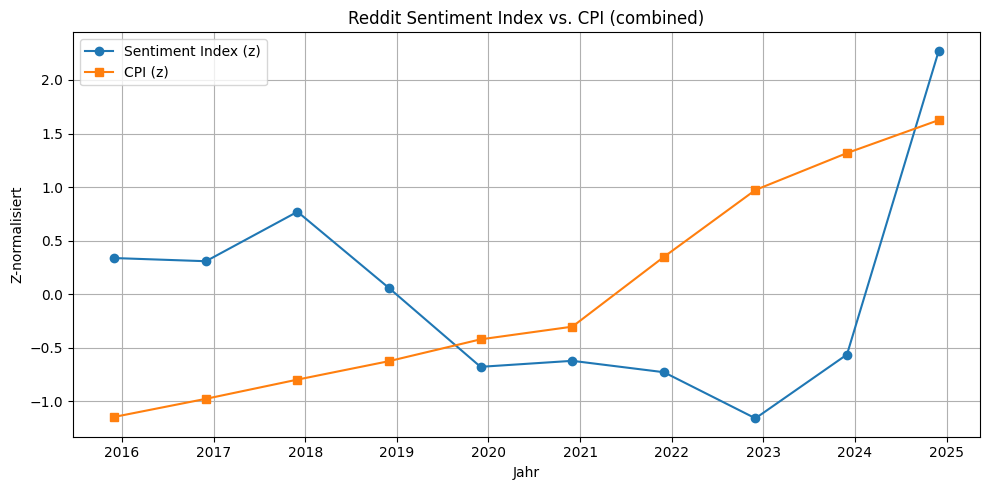

Korrelation für combined (z-transformiert): 0.079


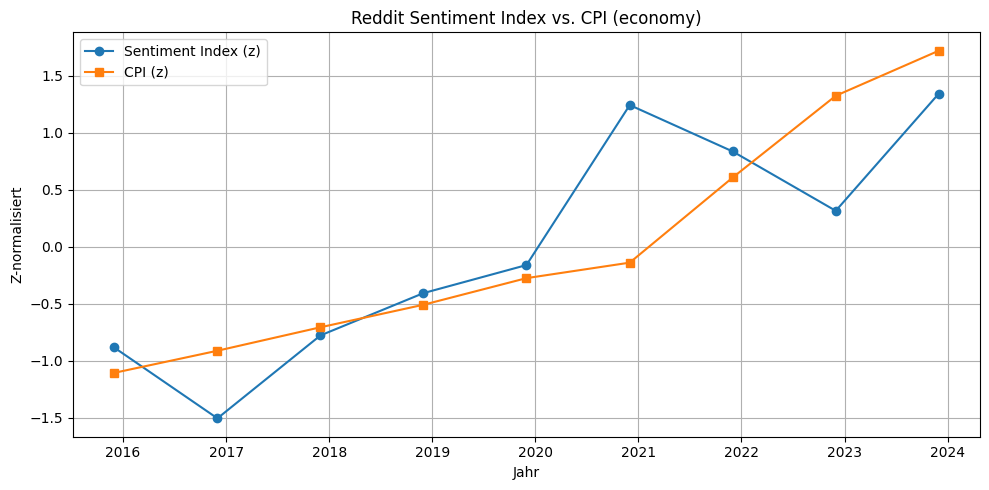

Korrelation für economy (z-transformiert): 0.778


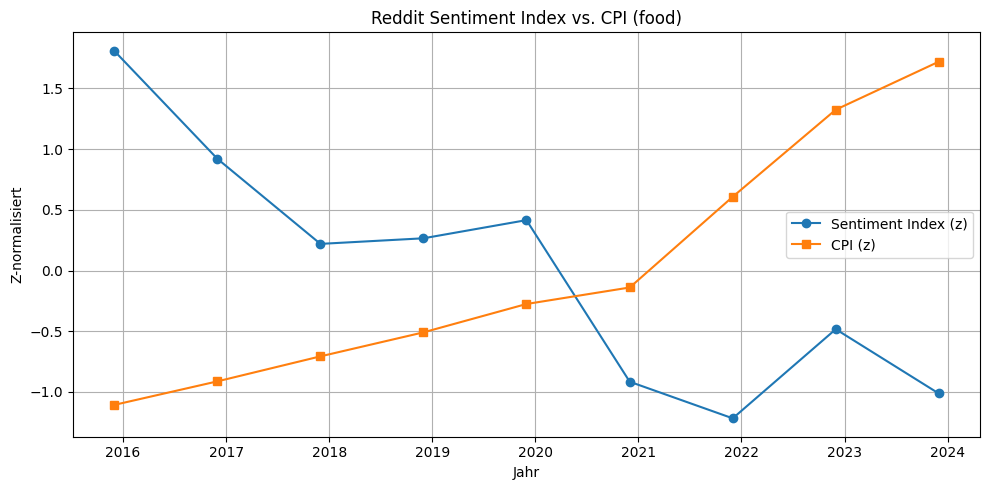

Korrelation für food (z-transformiert): -0.781


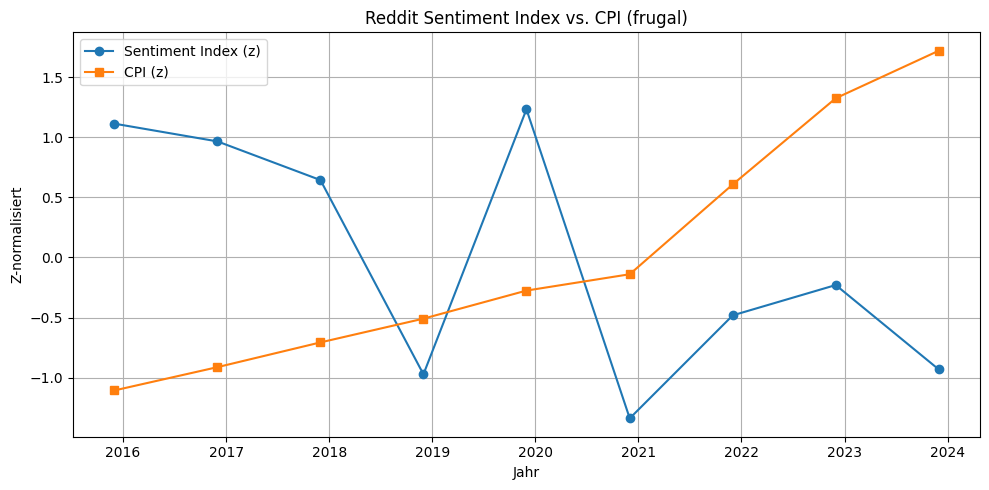

Korrelation für frugal (z-transformiert): -0.554


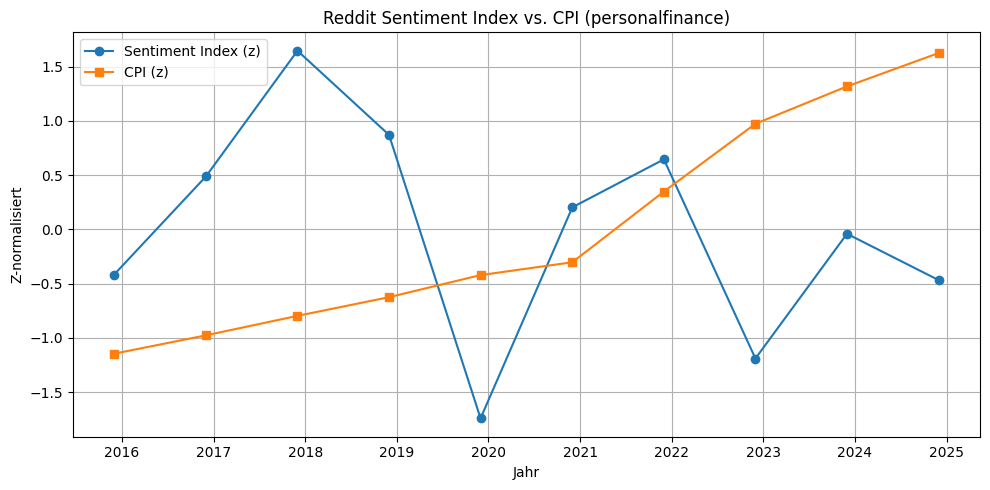

Korrelation für personalfinance (z-transformiert): -0.325


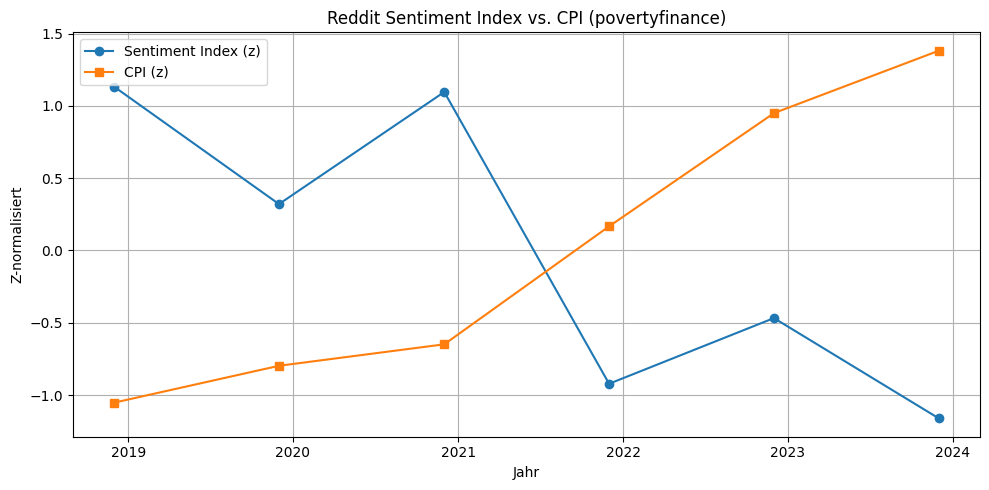

Korrelation für povertyfinance (z-transformiert): -0.872


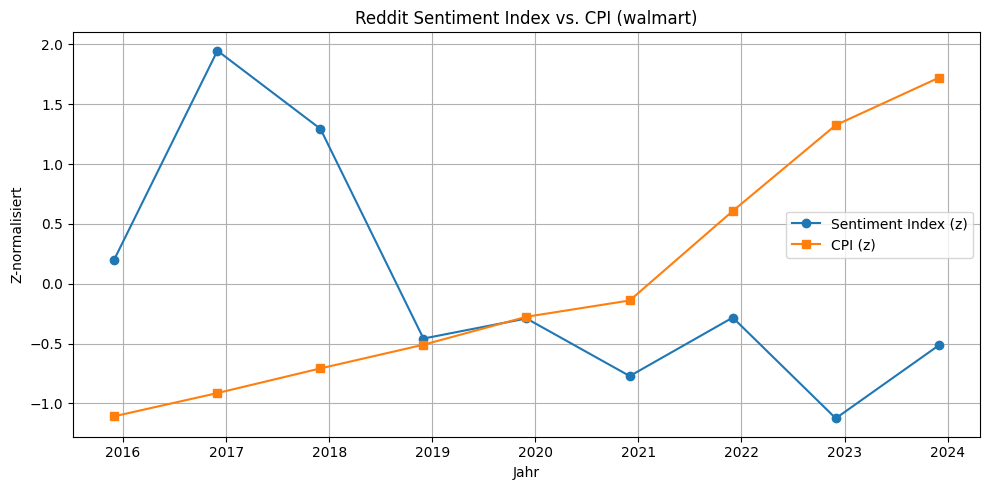

Korrelation für walmart (z-transformiert): -0.630


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from glob import glob
import os

# CPI-Daten laden und auf Dezember filtern
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]

# Alle sentiment-Dateien finden
sentiment_files = sorted(glob("data/sentiment/sentiment_*.csv"))

for file in sentiment_files:
    name = os.path.basename(file).replace("sentiment_", "").replace(".csv", "")
    sentiment = pd.read_csv(file, parse_dates=["date"])
    
    df = pd.merge(sentiment, cpi_dec, on="date", how="inner")
    
    df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
    df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
    
    plt.figure(figsize=(10, 5))
    plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
    plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
    plt.title(f"Reddit Sentiment Index vs. CPI ({name})")
    plt.xlabel("Jahr")
    plt.ylabel("Z-normalisiert")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
    print(f"Korrelation für {name} (z-transformiert): {corr:.3f}")

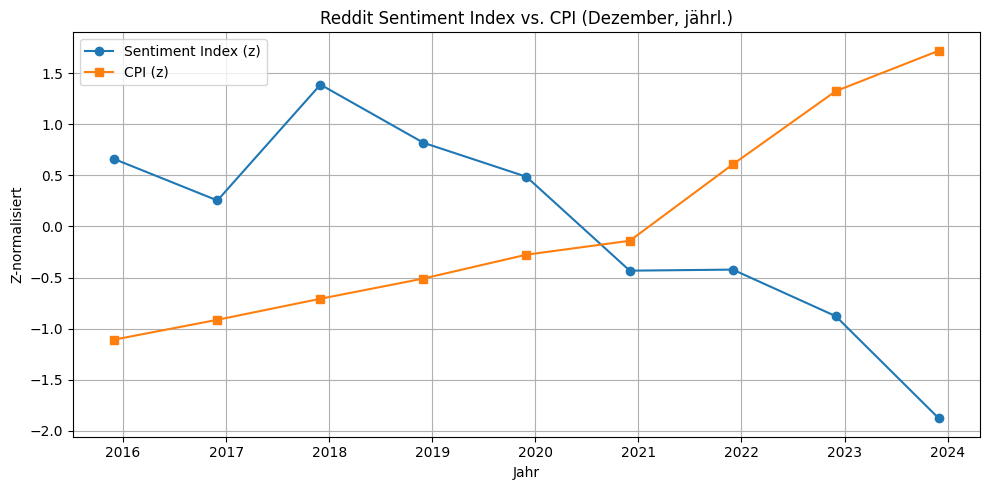

Korrelation (z-transformiert): -0.886


In [26]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_1_economy.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

Invert

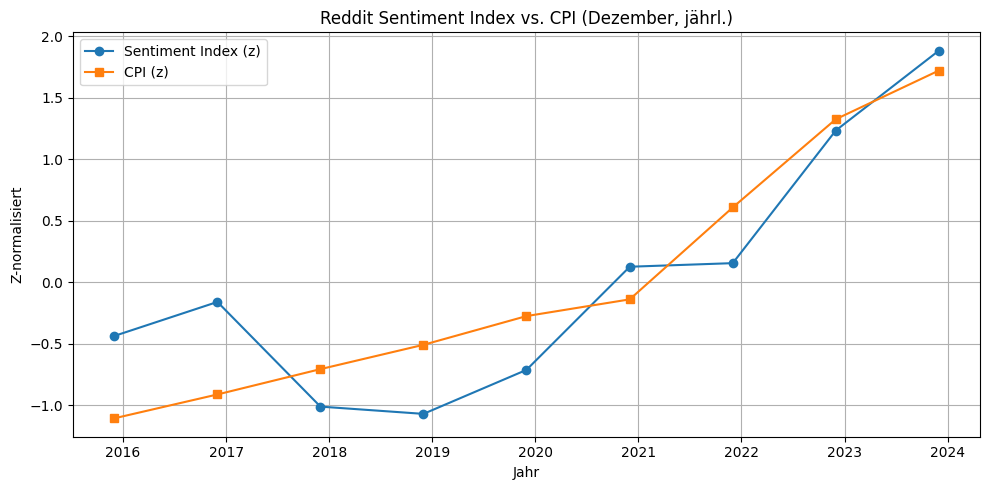

Korrelation (z-transformiert): 0.880


In [5]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_3_economy.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

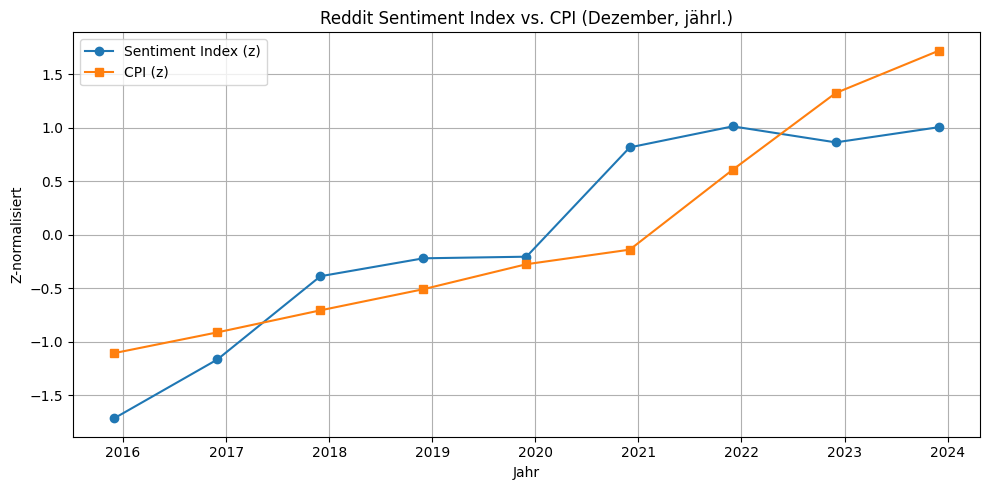

Korrelation (z-transformiert): 0.848


In [14]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_bert_food.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

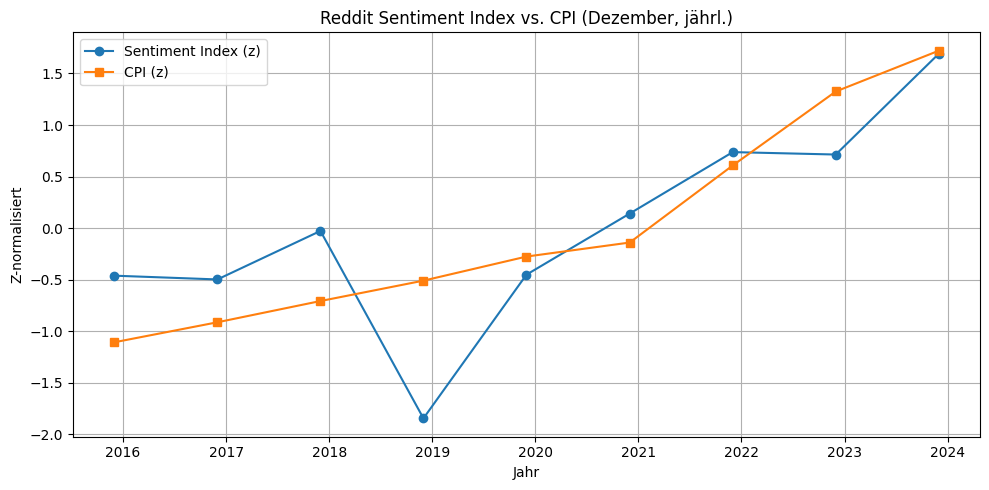

Korrelation (z-transformiert): 0.791


In [9]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_bert_walmart.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

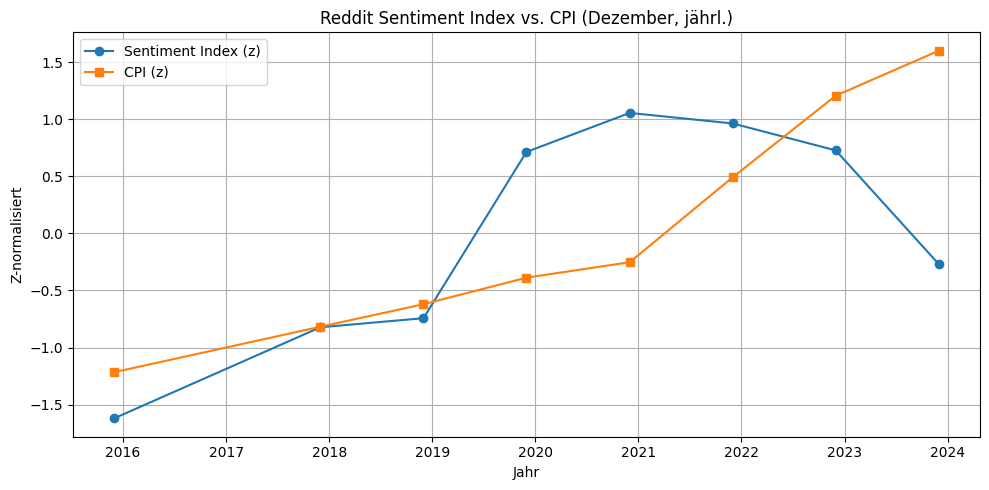

Korrelation (z-transformiert): 0.497


In [11]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_bert_AskAnAmerican.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

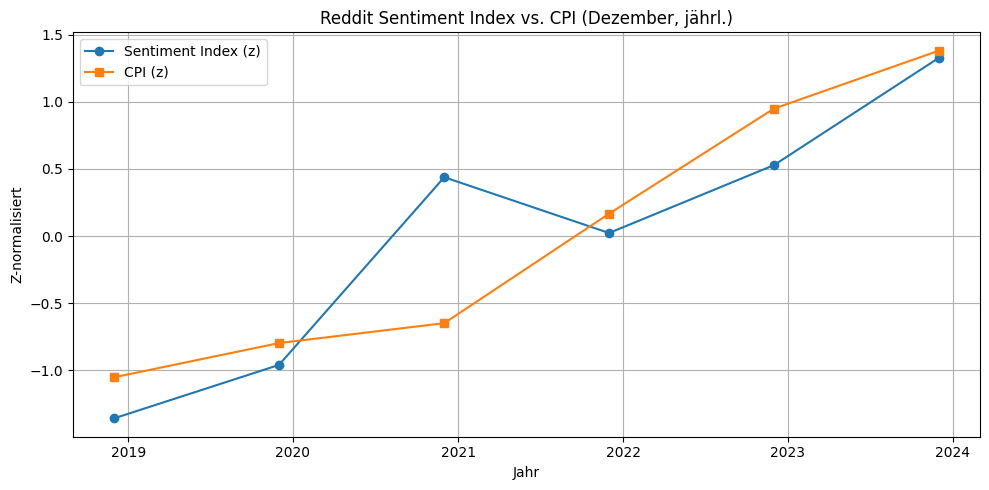

Korrelation (z-transformiert): 0.850


In [12]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_bert_povertyfinance.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

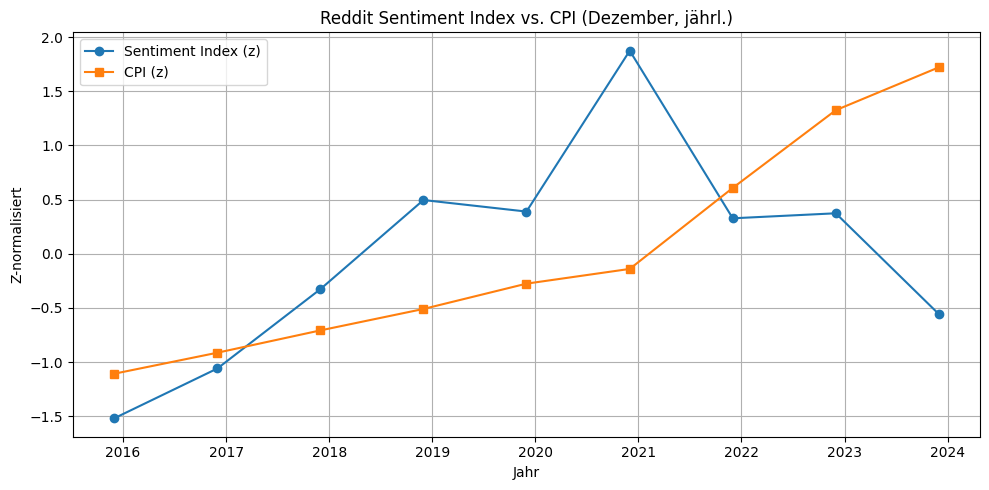

Korrelation (z-transformiert): 0.249


In [13]:
# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_bert_frugal.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

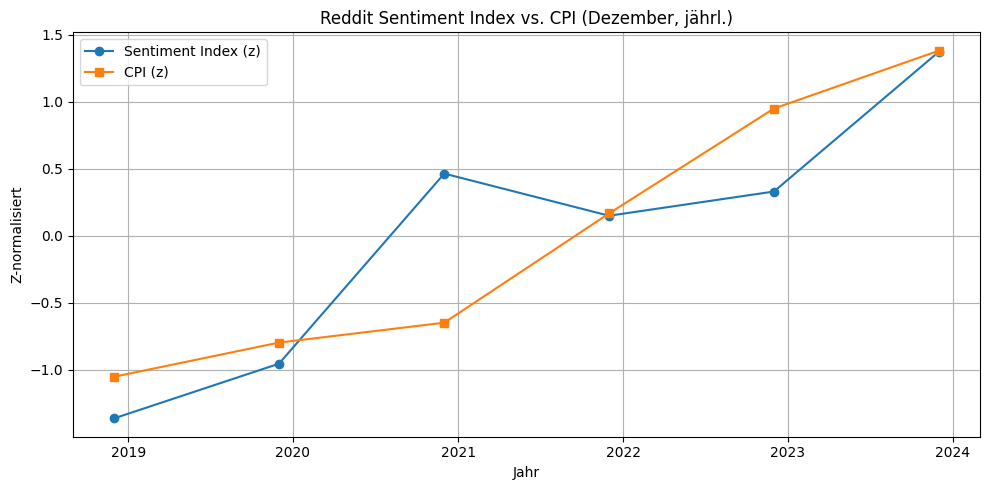

Korrelation (z-transformiert): 0.826


In [17]:
sentiment = pd.read_csv("data/sentiment/sentiment_supervised_povertyfinance.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

In [ ]:


# Lade Sentiment-Daten


sentiment = pd.read_csv("data/sentiment/sentiment_supervised_food.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")




sentiment = pd.read_csv("data/sentiment/sentiment_supervised_economy.csv", parse_dates=["date"])
cpi = pd.read_csv("data/inlation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]
df = pd.merge(sentiment, cpi_dec, on="date", how="inner")


# Z-Transformation zur Vergleichbarkeit
df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
plt.title("Reddit Sentiment Index vs. CPI (Dezember, jährl.)")
plt.xlabel("Jahr")
plt.ylabel("Z-normalisiert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation
corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
print(f"Korrelation (z-transformiert): {corr:.3f}")

### Richtiger Datensatz

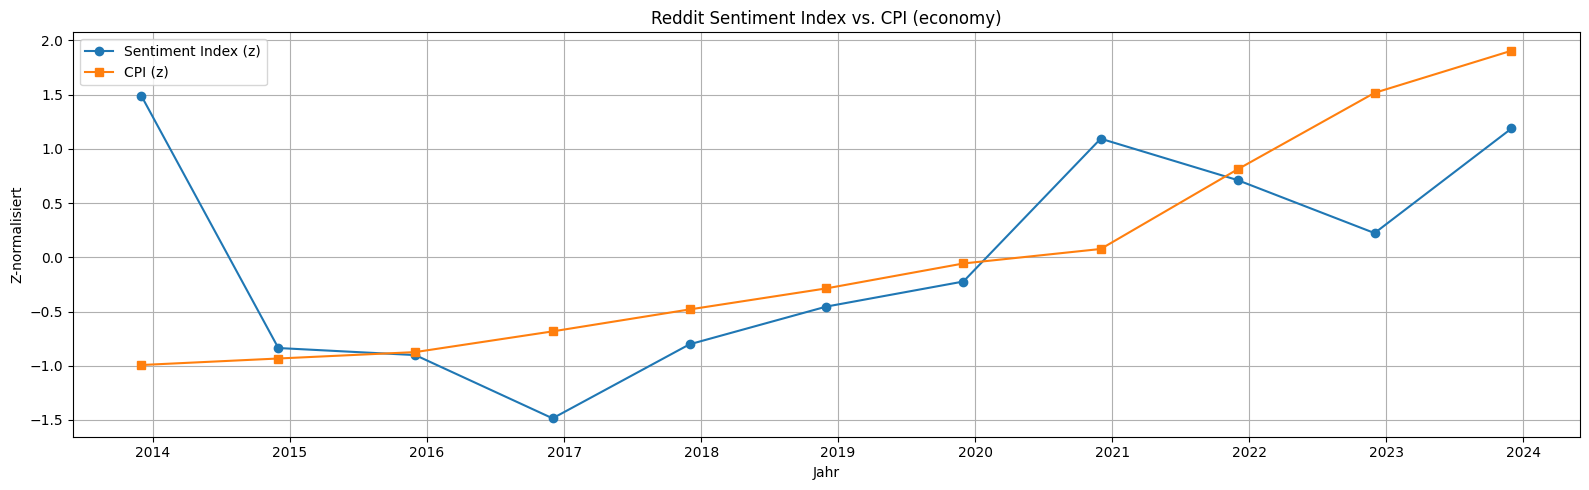

Korrelation für economy (z-transformiert): 0.490


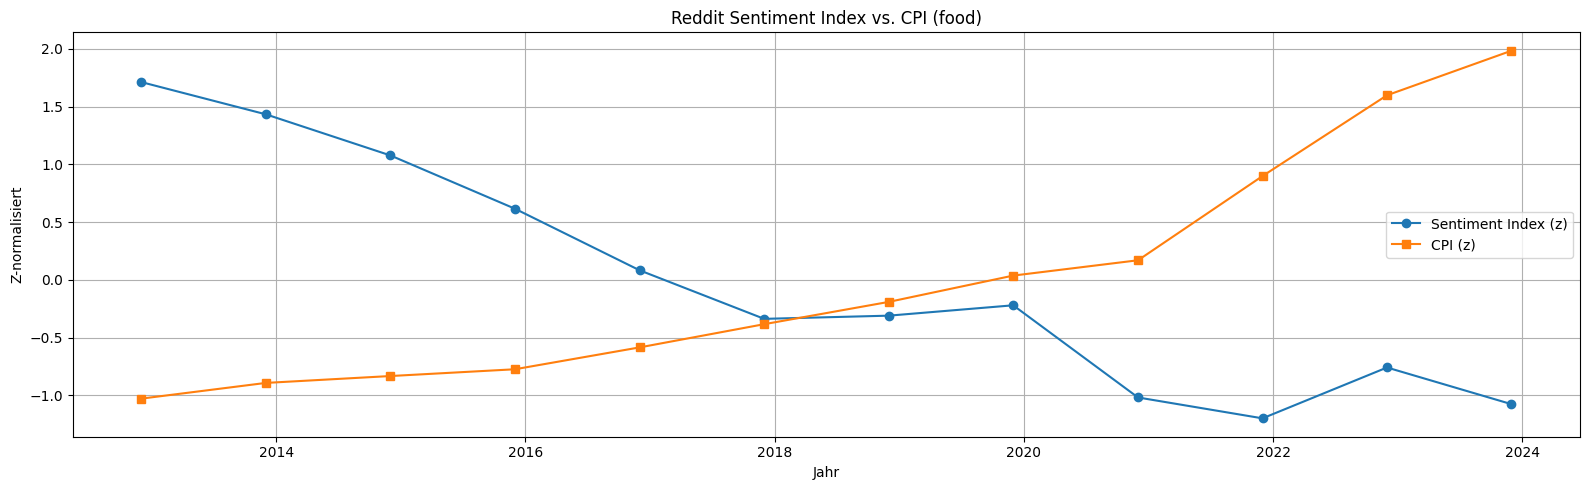

Korrelation für food (z-transformiert): -0.807


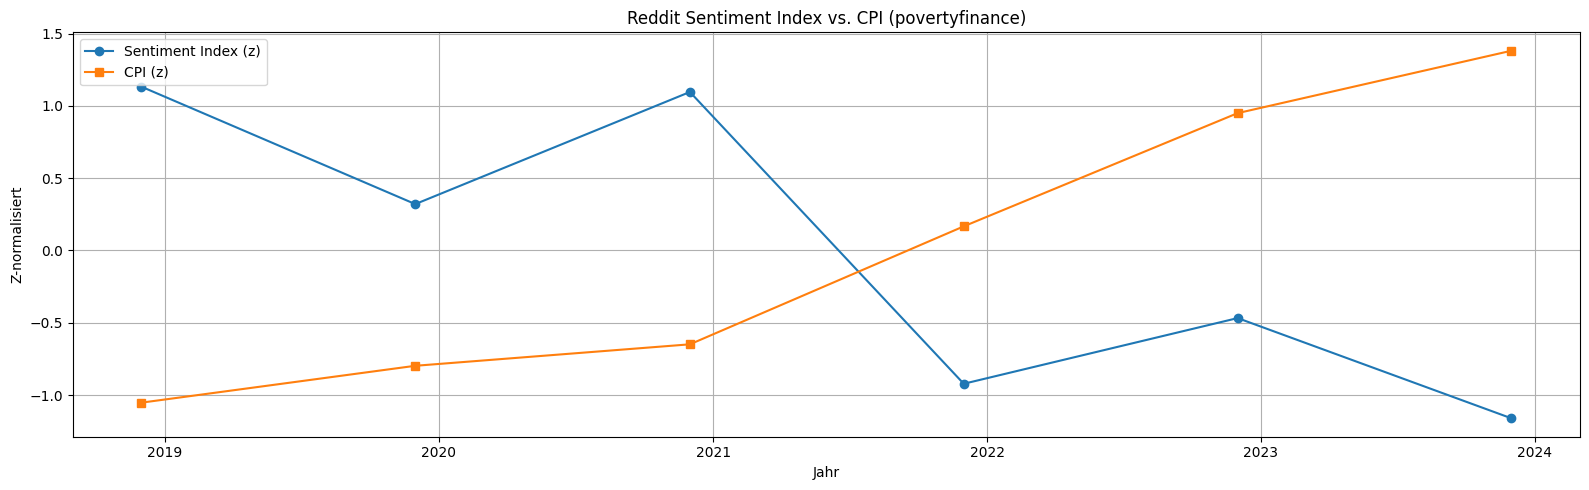

Korrelation für povertyfinance (z-transformiert): -0.872


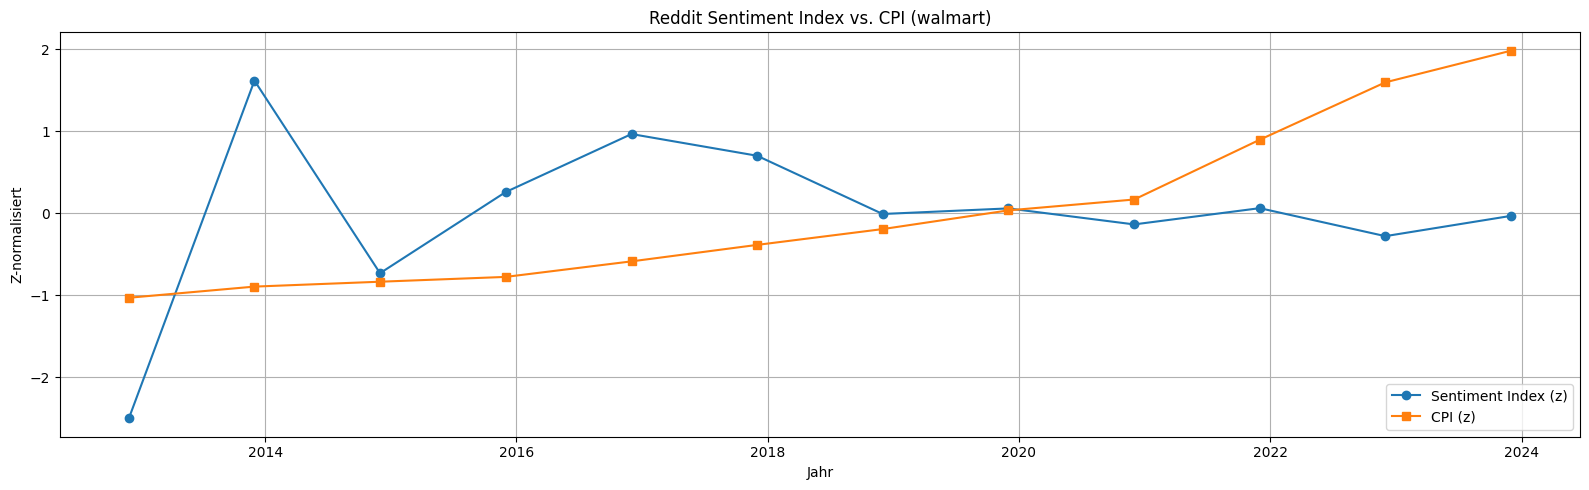

Korrelation für walmart (z-transformiert): 0.021


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from glob import glob
import os

# CPI-Daten laden und auf Dezember filtern
cpi = pd.read_csv("data/inflation/usa_inflation.csv", parse_dates=["date"])
cpi_dec = cpi[cpi["date"].dt.month == 12]

# Alle sentiment-Dateien finden
sentiment_files = sorted(glob("data/sentiment/sentiment_*.csv"))

for file in sentiment_files:
    name = os.path.basename(file).replace("sentiment_", "").replace(".csv", "")
    sentiment = pd.read_csv(file, parse_dates=["date"])
    
    df = pd.merge(sentiment, cpi_dec, on="date", how="inner")
    
    df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
    df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()
    
    plt.figure(figsize=(16, 5))
    plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
    plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
    plt.title(f"Reddit Sentiment Index vs. CPI ({name})")
    plt.xlabel("Jahr")
    plt.ylabel("Z-normalisiert")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])
    print(f"Korrelation für {name} (z-transformiert): {corr:.3f}")

/Users/christianleis/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


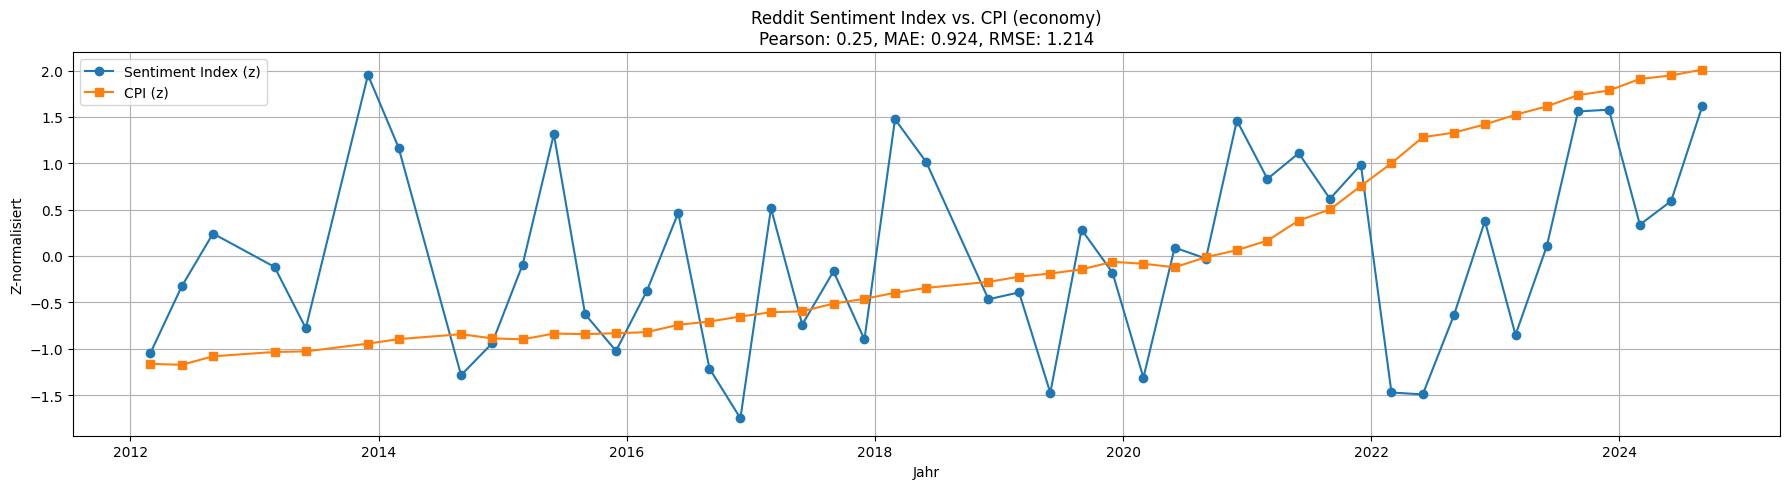

/Users/christianleis/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


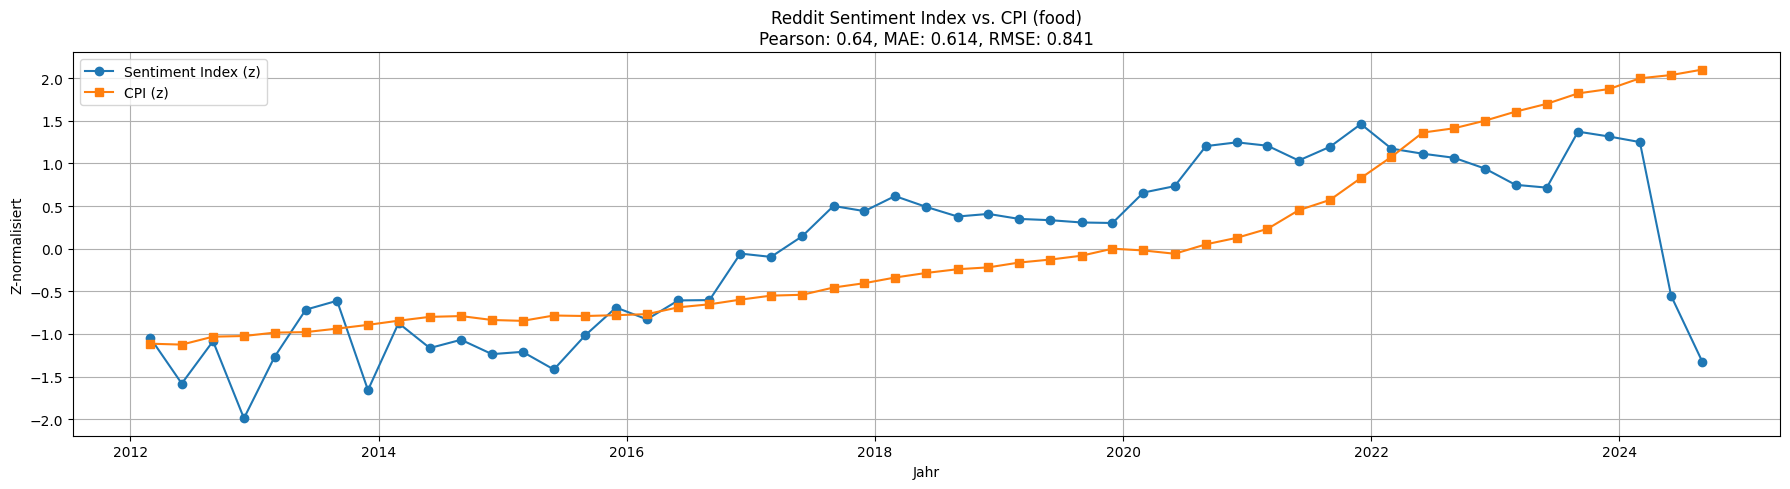

/Users/christianleis/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


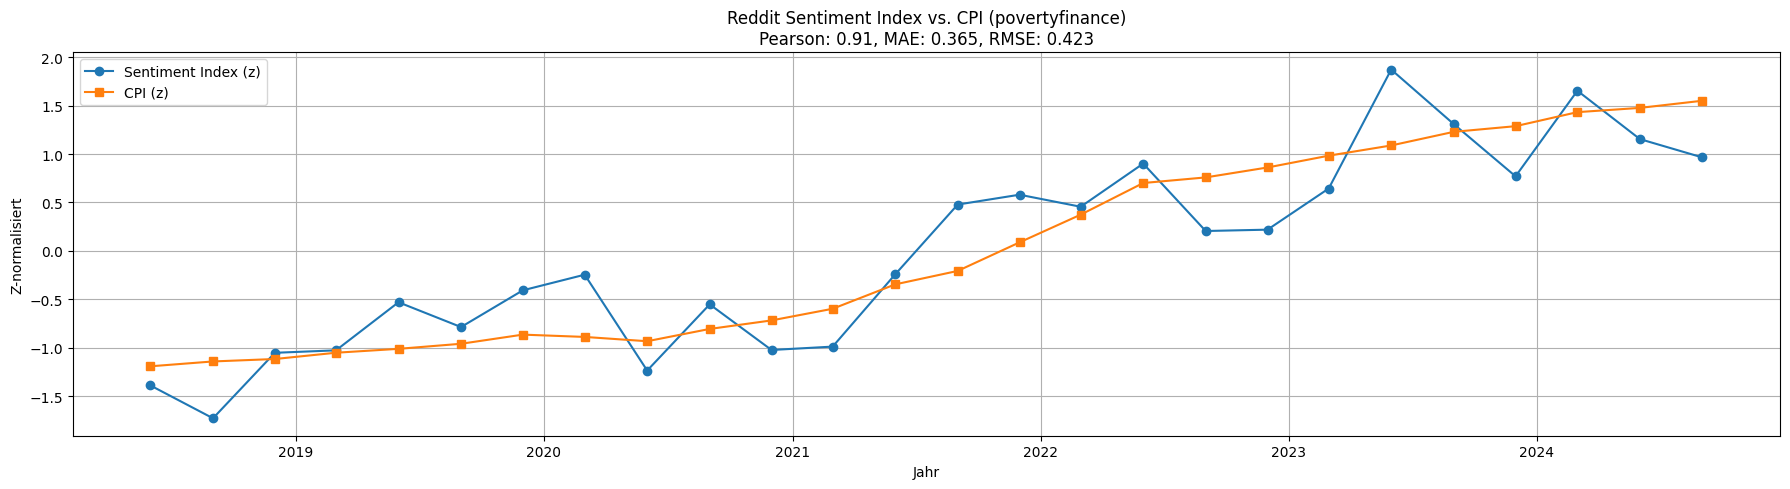

/Users/christianleis/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


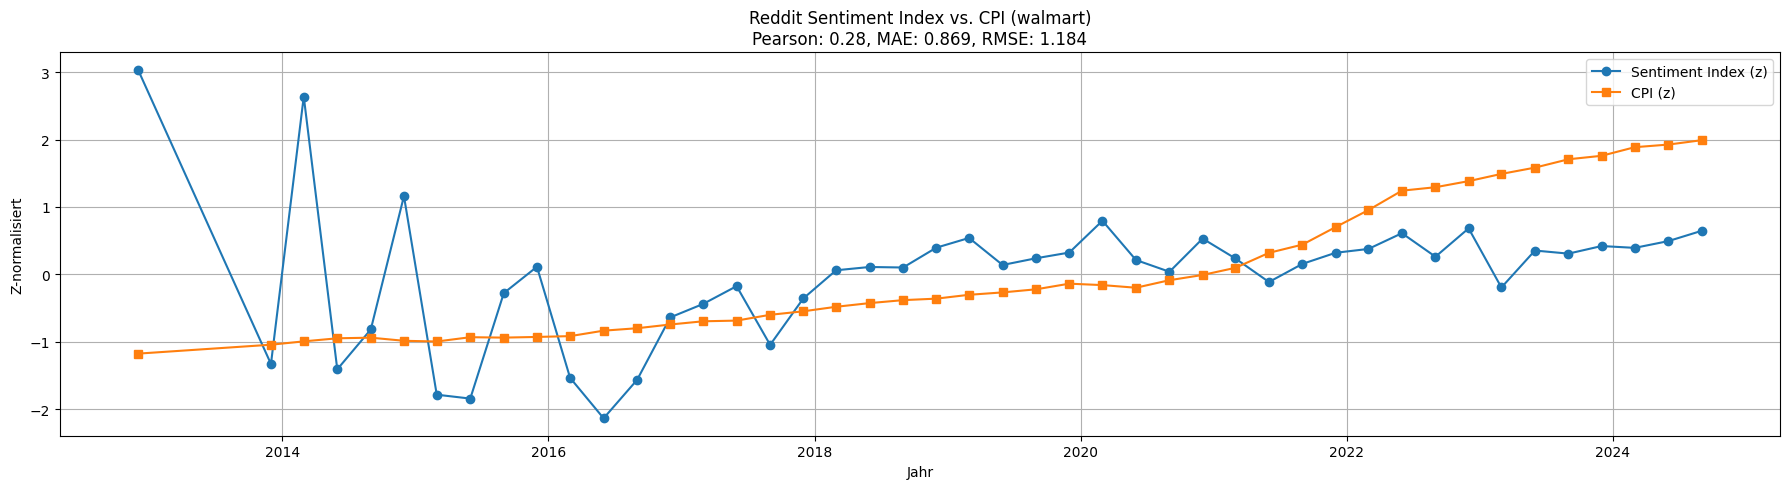

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
from glob import glob
import os
import numpy as np

# CPI-Daten laden und auf Dezember filtern
cpi = pd.read_csv("data/inflation/usa_inflation.csv", parse_dates=["date"])

# Alle sentiment-Dateien finden
sentiment_files = sorted(glob("data/sentiment/sentiment_*.csv"))

for file in sentiment_files:
    name = os.path.basename(file).replace("sentiment_", "").replace(".csv", "")
    sentiment = pd.read_csv(file, parse_dates=["date"])

    df = pd.merge(sentiment, cpi, on="date", how="inner")

    df["sentiment_z"] = (df["avg_sentiment"] - df["avg_sentiment"].mean()) / df["avg_sentiment"].std()
    df["cpi_z"] = (df["cpi_value"] - df["cpi_value"].mean()) / df["cpi_value"].std()

    # Pearson-Korrelation berechnen
    corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])

    # Falls negativ, invertiere Sentiment
    if corr < 0:
        df["sentiment_z"] *= -1
        corr, _ = pearsonr(df["sentiment_z"], df["cpi_z"])

    # MAE und RMSE berechnen
    mae = mean_absolute_error(df["cpi_z"], df["sentiment_z"])
    rmse = mean_squared_error(df["cpi_z"], df["sentiment_z"], squared=False)

    # Plot
    plt.figure(figsize=(18, 5))
    plt.plot(df["date"], df["sentiment_z"], label="Sentiment Index (z)", marker="o")
    plt.plot(df["date"], df["cpi_z"], label="CPI (z)", marker="s")
    plt.title(f"Reddit Sentiment Index vs. CPI ({name})\nPearson: {corr:.2f}, MAE: {mae:.3f}, RMSE: {rmse:.3f}")
    plt.xlabel("Jahr")
    plt.ylabel("Z-normalisiert")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

scheint als wenn food schon vorher inflation erfasst, leicht verschoben